### Linear Modeling Lab

This lab will walk us through some of the basics of building and interpreting linear models.  

It's designed with the following goals in mind:

 - Get more acclimated to the SKlearn api
 - Understanding the mechanics of linear models and how they build predictions
 - Properly interpreting and improving our results

### Step 1).  Load in the `housing.csv` file

In [3]:
import pandas as pd

df = pd.read_csv('../../data/housing.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 2).  Import and initialize the `LinearRegression` algorithm from `SKlearn`

In [5]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

### Step 3).  Fit an instance of the `LinearRegression` algorithm using *at least* 1 variable, but with more if you choose.

In [8]:
X = df[['AGE']]
y = df['CRIM']

lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 4).  Verify your coefficients and intercept term, and make a column for your predictions

In [64]:
lreg.coef_

lreg.intercept_

df['Predictions'] = lreg.predict(Z)

### Step 5).  Score your model

In [14]:
lreg.score(X,y)

0.12442145175894635

### Step 6). Adding Additional Terms

You have a fairly simple regression model right now, but there's lots of reasons to think that you can improve it. For now, try and identify at least 1 good variable to add to `X`.  

This should be a  variable that you expect will have a large impact on the value of `y`, that's independent of everything else.

**Hint:** the `pairplot` and `heatmap` from `Seaborn` are very helpful here.

**Also:** Are there any other terms that, when compared to the others, look like they might have the same effect?

Try a few different versions of `X`, and use your r-squared value to determine whether or not you've made an improvement.

In [109]:
X = df[['CRIM','INDUS','RAD','LSTAT','RM','TAX','DIS']]
y = df[['PRICE']]

Z = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]

lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lreg.score(X,y)

0.6756358661987398

In [76]:
lreg.fit(Z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lreg.score(Z,y)

0.7343070437613076

### Step 7a). Residuals

Create an `Error` column that's the difference between the predictions of your best model and the `PRICE` column.

In [65]:
df['Predictions'] = lreg.predict(Z)

df['Error'] = df['PRICE'] - df['Predictions']

### 7b).  What is the average value of the `Error` column?

In [66]:
#mean should be almost zero
df['Error'].mean()

-1.193248398640603e-14

### 7c).  What is its histogram?

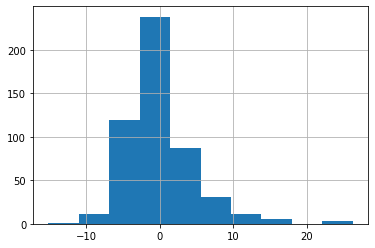

In [67]:
import matplotlib as mtp
import seaborn as sns
#should always be normally distributed
df['Error'].hist()

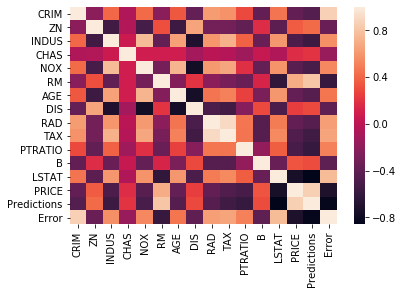

In [63]:
sns.heatmap(df.corr())

## Plotting

Make the following plots to verify your results:

### 8a).  Plot your `Prediction` column vs the `PRICE` column using `regplot` in `Seaborn`

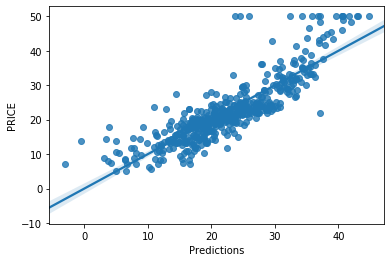

In [68]:
sns.regplot(df['Predictions'],df['PRICE'])

### 8b).  Plot your `Residual` column vs your `Prediction` column

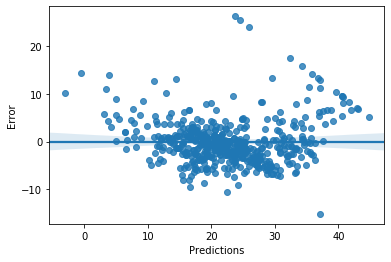

In [72]:
sns.regplot(df['Predictions'],df['Error'])

### 8c).  Plot your `Residual` column vs your `PRICE` column

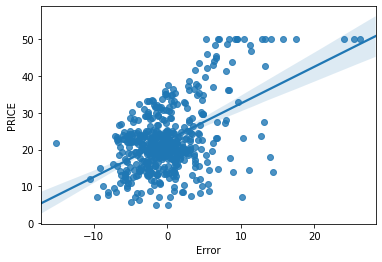

In [74]:
sns.regplot(df['Error'],df['PRICE'])

In [77]:
lreg.coef_

array([[-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,
         2.83999338e+00, -1.87580220e+01,  3.65811904e+00,
         3.61071055e-03, -1.49075365e+00,  2.89404521e-01,
        -1.26819813e-02, -9.37532900e-01, -5.52019101e-01]])

In [85]:
X = df.iloc[:,:13]

In [86]:
lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lreg.score(X,y)

0.7406426641094094

In [87]:
lreg.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [88]:
coeffs = pd.DataFrame({
    'Variable': X.columns,
    'Weight'  : lreg.coef_
}).sort_values(by='Weight', ascending = False)

Exception: Data must be 1-dimensional

In [94]:
X_std =(X-X.mean()) / X.std()

In [95]:
X_std.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.167427e-15,-1.258809e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [99]:
lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lreg.score(X,y)

0.7406426641094095

In [102]:
lreg.coef_

array([[-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
         2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
        -2.06264585,  0.85010886, -3.74733185]])

In [103]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2019)

In [111]:
X_train.head()

,CRIM,INDUS,RAD,LSTAT,RM,TAX,DIS
249,0.19073,5.86,7,6.56,6.718,330,7.8265
51,0.04337,5.64,4,9.43,6.115,243,6.8147
151,1.49632,19.58,5,13.28,5.404,403,1.5916
486,5.69175,18.10,24,14.98,6.114,666,3.5459
235,0.33045,6.20,8,10.88,6.086,307,3.6519


In [108]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)